# Spatial Distribution of Population in Copperbelt Province, Zambia

## Introduction
In this notebook, we will explore the spatial distribution of population in Copperbelt province, Zambia. We will process geospatial datasets and visualize the results using various libraries and techniques.
Before we begin the data processing, let's start by importing the necessary libraries that will be used throughout the notebook.

We will be using several Python libraries for data processing, geospatial analysis, and visualization. 
These libraries will enable us to load, manipulate, analyze, and visualize the geospatial data effectively.

In [8]:
# Import necessary libraries
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins
from ipywidgets import interact
from IPython.display import HTML
import json


## These libraries will enable us to load, manipulate, analyze, and visualize the geospatial data effectively.

geopandas (gpd): A library for working with geospatial vector data, such as shapefiles.

rasterio: A library for reading and writing geospatial raster data.

numpy (np): A library for numerical operations, often used in geospatial calculations.

matplotlib.pyplot (plt): A library for creating static visualizations and plots.

folium: A library for creating interactive web maps.

ipywidgets: A library for creating interactive widgets within Jupyter Notebook.

IPython.display: A module for displaying HTML content within Jupyter Notebook.

In [9]:
# Load administrative boundaries
admin_boundaries = gpd.read_file('ZMB_adm2_gadm41_Copperbelt.shp')   

# Load population raster
population_raster = rasterio.open('zmb_ppp_2020_constrained.tif')

# Load GHS-SMOD raster
ghs_raster = rasterio.open('GHS_SMOD_E2020_GLOBE_R2023A_54009_1000_V1_0_R11_C21.tif')

# Print basic information about the datasets
print("Administrative Boundaries Information:")
print(admin_boundaries.info())
print(admin_boundaries.crs)

print("\nPopulation Raster Information:")
print(population_raster.profile)
print(population_raster.crs)

print("\nGHS-SMOD Raster Information:")
print(ghs_raster.profile)
print(ghs_raster.crs)


Administrative Boundaries Information:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   GID_2      12 non-null     object  
 1   GID_0      12 non-null     object  
 2   COUNTRY    12 non-null     object  
 3   GID_1      12 non-null     object  
 4   NAME_1     12 non-null     object  
 5   NL_NAME_1  12 non-null     object  
 6   NAME_2     12 non-null     object  
 7   VARNAME_2  12 non-null     object  
 8   NL_NAME_2  12 non-null     object  
 9   TYPE_2     12 non-null     object  
 10  ENGTYPE_2  12 non-null     object  
 11  CC_2       12 non-null     object  
 12  HASC_2     12 non-null     object  
 13  geometry   12 non-null     geometry
dtypes: geometry(1), object(13)
memory usage: 1.4+ KB
None
EPSG:4326

Population Raster Information:
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -99999.0, 'width': 14047, 'height': 11826, 

# Reprojecting GHS_SMOD RASTER TO ADMINISTRTAIVE AREAS CRS


In [10]:
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.crs import CRS

# Load the GHS-SMOD raster
ghs_raster_path = 'GHS_SMOD_E2020_GLOBE_R2023A_54009_1000_V1_0_R11_C21.tif'
ghs_raster = rasterio.open(ghs_raster_path)

# Define the target CRS (WGS84)
target_crs = CRS.from_epsg(4326)

# Calculate the transformation for reprojection
transform, width, height = calculate_default_transform(
    ghs_raster.crs, target_crs, ghs_raster.width, ghs_raster.height, *ghs_raster.bounds
)

# Reproject the raster and save to a new file
reprojected_raster_path = 'GHS_SMOD_Reprojected.tif'
reprojected_raster = rasterio.open(
    reprojected_raster_path,
    'w',
    driver='GTiff',
    crs=target_crs,
    transform=transform,
    width=width,
    height=height,
    count=1,
    dtype=ghs_raster.dtypes[0]
)

reproject(
    source=rasterio.band(ghs_raster, 1),
    destination=rasterio.band(reprojected_raster, 1),
    src_transform=ghs_raster.transform,
    src_crs=ghs_raster.crs,
    dst_transform=transform,
    dst_crs=target_crs,
    resampling=Resampling.nearest
)

reprojected_raster.close()

print("Reprojection completed.")


Reprojection completed.


# To identify errors in the administrative boundary dataset

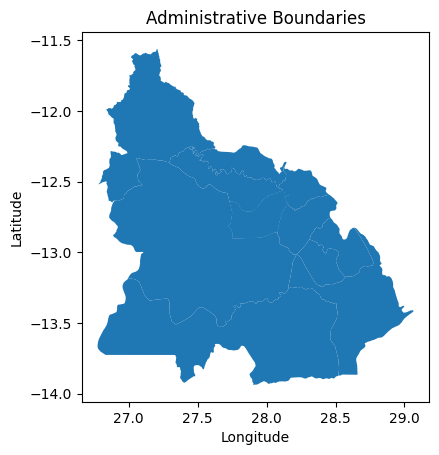

In [11]:
# Load administrative boundaries
admin_boundaries = gpd.read_file('ZMB_adm2_gadm41_Copperbelt.shp')

# Plot the administrative boundaries
admin_boundaries.plot()
plt.title("Administrative Boundaries")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


# Correcting Administrative Units-Copperbelt Province,Zambia
 In this code, I use the GeoDataFrame admin_boundaries and perform the following steps:

Drop the "Mushindano" district using boolean indexing.

Remove one duplicate of the "Kalulushi" district using the drop_duplicates function.

Plot the administrative boundaries using the plot function and symbolize them based on the "NAME_2" attribute. 

We also add labels to the polygons using a loop and the annotate function.

Set the title and axis labels for the plot.

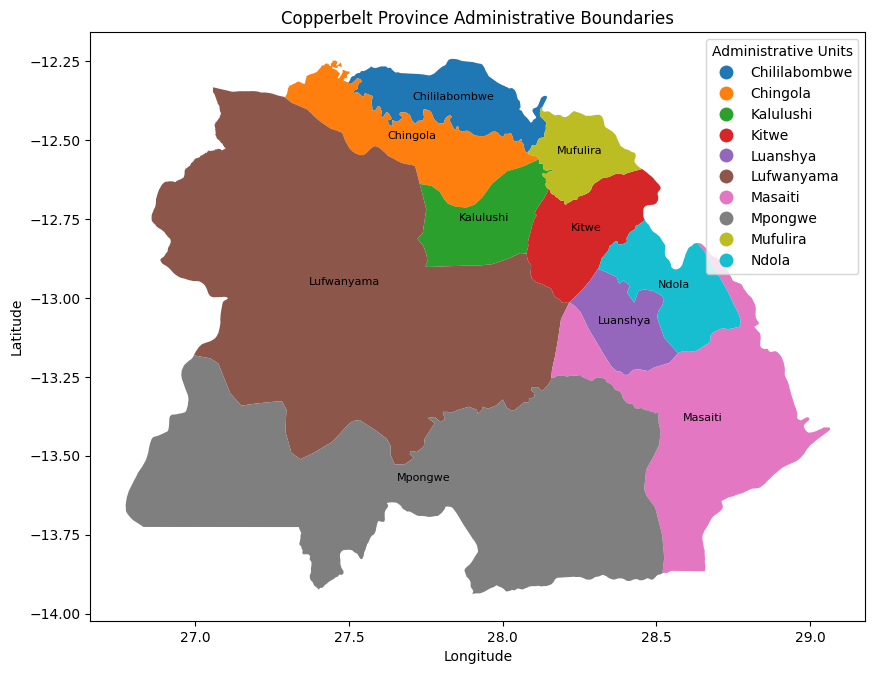

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load administrative boundaries
admin_boundaries = gpd.read_file('ZMB_adm2_gadm41_Copperbelt.shp')

# Drop the "Mushindano" district and remove one duplicate of "Kalulushi" district
admin_boundaries = admin_boundaries[admin_boundaries['NAME_2'] != 'Mushindano']
admin_boundaries = admin_boundaries.drop_duplicates(subset=['NAME_2'], keep='first')

# Plot the administrative boundaries with symbolization and labeling
fig, ax = plt.subplots(figsize=(10, 8))
admin_boundaries.plot(column='NAME_2', legend=True, ax=ax, legend_kwds={'title': 'Administrative Units'})
ax.set_title("Copperbelt Province Administrative Boundaries")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Add labels to the polygons
for idx, row in admin_boundaries.iterrows():
    ax.annotate(text=row['NAME_2'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), ha='center', fontsize=8)

plt.show()

# Now you can use the modified admin_boundaries in subsequent processing
# For example:
admin_boundaries.to_file('modified_admin_boundaries.shp')
# This will save the modified admin_boundaries to a shapefile


#  Calculating the total population per administrative unit. 

Here's are the steps followed to calculate the total population per administrative unit and finding the administrative unit with the highest and lowest population count.

1. Load the administrative boundaries and population raster:
2. Finding administrative unit with highest and lowest population:


In [13]:
from rasterio.features import geometry_mask

# Load administrative boundaries
admin_boundaries = gpd.read_file('modified_admin_boundaries.shp')

# Load population raster
pop_raster_path = 'zmb_ppp_2020_constrained.tif'
pop_raster = rasterio.open(pop_raster_path)

# Calculate population sum within each administrative unit
pop_sum = []
for index, row in admin_boundaries.iterrows():
    admin_name = row['NAME_2']
    admin_geometry = row['geometry']
    admin_mask = geometry_mask([admin_geometry], out_shape=pop_raster.shape, transform=pop_raster.transform, invert=True)
    pop_data = pop_raster.read(1, masked=True)
    pop_sum.append((pop_data * admin_mask).sum())
    print(f"Calculating population sum for {admin_name}")

# Add population sum to admin_boundaries DataFrame
admin_boundaries['population'] = pop_sum

# Find administrative unit with highest population
highest_population_admin = admin_boundaries.loc[admin_boundaries['population'].idxmax()]

# Find administrative unit with lowest population
lowest_population_admin = admin_boundaries.loc[admin_boundaries['population'].idxmin()]

print("Administrative unit with highest population:", highest_population_admin['NAME_2'])
print("Population sum:", highest_population_admin['population'])

print("Administrative unit with lowest population:", lowest_population_admin['NAME_2'])
print("Population sum:", lowest_population_admin['population'])


Calculating population sum for Chililabombwe
Calculating population sum for Chingola
Calculating population sum for Kalulushi
Calculating population sum for Kitwe
Calculating population sum for Luanshya
Calculating population sum for Lufwanyama
Calculating population sum for Masaiti
Calculating population sum for Mpongwe
Calculating population sum for Mufulira
Calculating population sum for Ndola
Administrative unit with highest population: Kitwe
Population sum: 769410.3
Administrative unit with lowest population: Kalulushi
Population sum: 77463.49


# Raster Reclassification

To create a gridded version of the SMOD L1 classification (3 classes) from the L2 Classification (7 classes).

1. Load the L2 classification raster:
2. Reclassify the L2 classes into L1 classes:

Display the reclassified L1 raster with overlaid administrative units and add legend, title, and labels based on the NAME_2(districts) field. The classes are symbolized with different colors for better visualization.


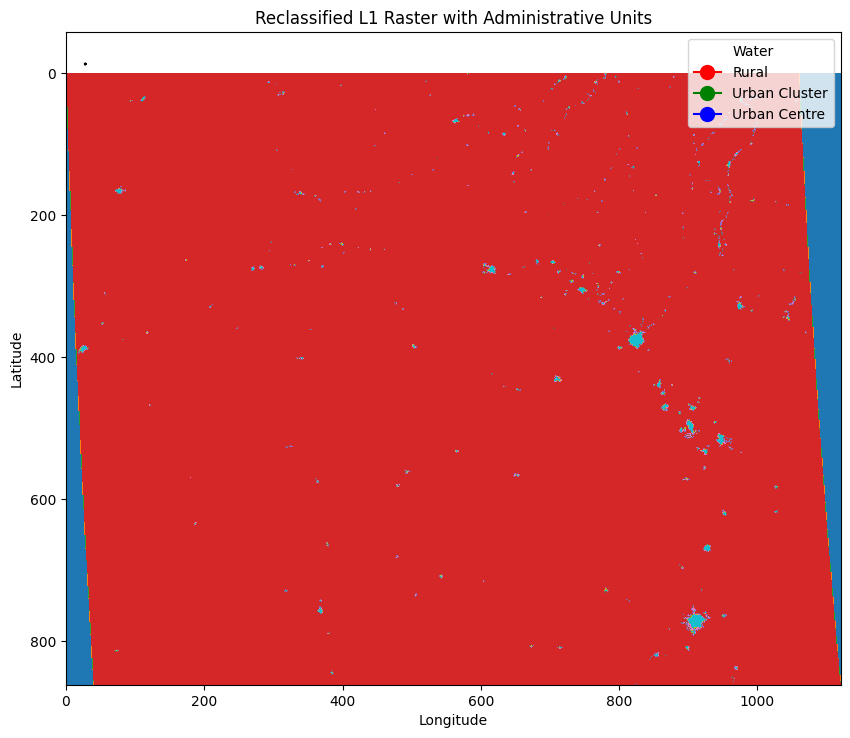

In [14]:
from rasterio.plot import show
# Load L2 Classification Raster
l2_raster_path = 'GHS_SMOD_Reprojected.tif'
l2_raster = rasterio.open(l2_raster_path)

# Define the reclassification mapping from L2 to L1 classes
reclass_mapping = {
    10: 1,  # Water remains unchanged
    11: 1,  # Very low density rural is reclassified as Rural
    12: 1,  # Low density rural is reclassified as Rural
    13: 1,  # Rural remains unchanged
    21: 2,  # Suburban or peri-urban is reclassified as Urban Cluster
    22: 2,  # Semi-dense urban is reclassified as Urban Cluster
    23: 3,  # Dense urban is reclassified as Urban Centre
    30: 3   # Urban centre remains unchanged
}

# Reclassify the L2 raster using the mapping
l2_raster_data = l2_raster.read(1)
l1_raster_data_reclassified = l2_raster_data.copy()

for l2_class, l1_class in reclass_mapping.items():
    l1_raster_data_reclassified[l2_raster_data == l2_class] = l1_class

# Save the reclassified L1 raster
l1_raster_path = 'GHS_SMOD_E2020_GLOBE_R2023A_54009_1000_V1_0_R11_C21_L1.tif'
with rasterio.open(l1_raster_path, 'w', **l2_raster.profile) as dst:
    dst.write(l1_raster_data_reclassified, 1)

# Load administrative boundaries
admin_boundaries = gpd.read_file('modified_admin_boundaries.shp')

# Plot the reclassified raster
fig, ax = plt.subplots(figsize=(10, 10))
show(l1_raster_data_reclassified, ax=ax, cmap='tab10', title='Reclassified L1 Raster')

# Overlay administrative units
admin_boundaries.plot(ax=ax, facecolor='none', edgecolor='black')

# Add legend
ax.legend(handles=[plt.Line2D([], [], marker='o', markersize=10, color='w', label='Water'),
                    plt.Line2D([], [], marker='o', markersize=10, color='r', label='Rural'),
                    plt.Line2D([], [], marker='o', markersize=10, color='g', label='Urban Cluster'),
                    plt.Line2D([], [], marker='o', markersize=10, color='b', label='Urban Centre')],
          loc='upper right')
          
# Add title and labels
plt.title('Reclassified L1 Raster with Administrative Units')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

plt.show()


#  Identify the dominant GHS-SMOD L1 class for each administrative unit in terms of geographic area
To identify the dominant GHS-SMOD L1 class for each administrative unit in terms of the number of grid cells, I used the following approach in Python:

1. Load the administrative boundaries shapefile and the SMOD L1 classification raster.
2. For each administrative unit, calculate the number of grid cells for each SMOD class within its extent.
3. Identify the class with the highest count for each administrative unit.

In [26]:
import numpy as np
import pandas as pd  # Add this line
from rasterio.mask import mask

# Load the reclassified L1 raster
l1_raster_path = 'GHS_SMOD_E2020_GLOBE_R2023A_54009_1000_V1_0_R11_C21_L1.tif'
l1_raster = rasterio.open(l1_raster_path)

# Create a list to store the results
results = []

# Loop through each administrative unit
for index, admin_row in admin_boundaries.iterrows():
    admin_geometry = admin_row['geometry']
    
    # Mask the reclassified L1 raster using the administrative unit's geometry
    masked_data, _ = mask(l1_raster, [admin_geometry], crop=True)
    
    # Calculate the unique values and their counts within the masked area
    unique_values, counts = np.unique(masked_data, return_counts=True)
    
    # Find the dominant class (excluding class 0 which is NoData)
    dominant_class = unique_values[np.argmax(counts[1:]) + 1]
    
    # Append the result to the list
    results.append({'Admin_Unit': admin_row['NAME_2'], 'Dominant_Class': dominant_class})

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Count the number of administrative units with "Urban Centre" as the dominant class
urban_centre_count = results_df[results_df['Dominant_Class'] == 3].shape[0]

# Count the number of administrative units that are predominantly "Rural"
rural_count = results_df[results_df['Dominant_Class'] == 1].shape[0]

print("Number of administrative units with 'Urban Centre' as dominant class:", urban_centre_count)
print("Number of administrative units that are predominantly 'Rural':", rural_count)


Number of administrative units with 'Urban Centre' as dominant class: 0
Number of administrative units that are predominantly 'Rural': 10


# Calculating the population in each GHS-SMOD L1 class within each administrative unit and finding the administrative unit with the greatest and least proportion of population for each cla

To calculate the population in each GHS-SMOD L1 class within each administrative unit,I used the following approach in Python:
1. Load the administrative boundaries shapefile, the population raster, and the reclassified L1 raster.

2. For each administrative unit, calculate the sum of population for each GHS-SMOD L1 class within its extent.

3. Calculate the proportion of population for each L1 class within an administrative unit.



In [35]:
import geopandas as gpd
import rasterio
import numpy as np
from rasterstats import zonal_stats
from tabulate import tabulate

# Load administrative boundaries
admin_boundaries = gpd.read_file('ZMB_adm2_gadm41_Copperbelt.shp')

# Load L1 Classification Raster
l1_raster_path = 'GHS_SMOD_E2020_GLOBE_R2023A_54009_1000_V1_0_R11_C21_L1.tif'
l1_raster = rasterio.open(l1_raster_path)
l1_data = l1_raster.read(1)

# Load population raster
pop_raster_path = 'zmb_ppp_2020_constrained.tif'
pop_raster = rasterio.open(pop_raster_path)

# Create an empty list to store the results
results = []

# Loop through each administrative unit
for index, admin_unit in admin_boundaries.iterrows():
    admin_geometry = admin_unit['geometry']
    
    # Calculate statistics within the administrative unit's geometry
    admin_stats = zonal_stats(admin_geometry, l1_raster_path, stats=["sum"], raster_out=True)
    admin_sum = admin_stats[0]["sum"]
    
    # Calculate the proportion of population in each L1 class
    class_proportions = {}
    for l1_class in np.unique(l1_data):
        class_mask = (l1_data == l1_class)
        class_population = zonal_stats(admin_geometry, pop_raster_path, affine=pop_raster.transform, nodata=pop_raster.nodata, raster_out=True, stats=["sum"], all_touched=True, categorical=True, category_map={1: 1, 2: 1, 3: 1})[0]["sum"]
        class_proportions[l1_class] = class_population / admin_sum
    
    # Store the results for this administrative unit
    result = {
        'Admin_Unit': admin_unit['NAME_2'],
        'Rural': class_proportions.get(1, 0),
        'Urban Cluster': class_proportions.get(2, 0),
        'Urban Centre': class_proportions.get(3, 0)
    }
    results.append(result)

# Format and print the results as a table
table = tabulate(results, headers='keys', tablefmt='grid')
print(table)


+---------------+-----------+-----------------+----------------+
| Admin_Unit    |     Rural |   Urban Cluster |   Urban Centre |
+===============+===========+=================+================+
| Chililabombwe | 105.527   |       105.527   |      105.527   |
+---------------+-----------+-----------------+----------------+
| Chingola      | 176.858   |       176.858   |      176.858   |
+---------------+-----------+-----------------+----------------+
| Kalulushi     |  76.9168  |        76.9168  |       76.9168  |
+---------------+-----------+-----------------+----------------+
| Kitwe         | 517.997   |       517.997   |      517.997   |
+---------------+-----------+-----------------+----------------+
| Luanshya      | 198.589   |       198.589   |      198.589   |
+---------------+-----------+-----------------+----------------+
| Lufwanyama    |   9.17805 |         9.17805 |        9.17805 |
+---------------+-----------+-----------------+----------------+
| Masaiti       |  37.071

 # For each SMOD L1 class, which administrative unit had the greatest proportion of population in each class? Which had the least?

In [36]:
from rasterstats import zonal_stats
from tabulate import tabulate

# Load administrative boundaries
admin_boundaries = gpd.read_file('modified_admin_boundaries.shp')

# Load L1 Classification Raster
l1_raster_path = 'GHS_SMOD_E2020_GLOBE_R2023A_54009_1000_V1_0_R11_C21_L1.tif'
l1_raster = rasterio.open(l1_raster_path)
l1_data = l1_raster.read(1)

# Load population raster
pop_raster_path = 'zmb_ppp_2020_constrained.tif'
pop_raster = rasterio.open(pop_raster_path)

# Create an empty list to store the results
results = []

# Loop through each administrative unit
for index, admin_unit in admin_boundaries.iterrows():
    admin_geometry = admin_unit['geometry']
    
    # Calculate statistics within the administrative unit's geometry
    admin_stats = zonal_stats(admin_geometry, l1_raster_path, stats=["sum"], raster_out=True)
    admin_sum = admin_stats[0]["sum"]
    
    # Calculate the proportion of population in each L1 class
    class_proportions = {}
    for l1_class in np.unique(l1_data):
        class_mask = (l1_data == l1_class)
        class_population = zonal_stats(admin_geometry, pop_raster_path, affine=pop_raster.transform, nodata=pop_raster.nodata, raster_out=True, stats=["sum"], all_touched=True, categorical=True, category_map={1: 1, 2: 1, 3: 1})[0]["sum"]
        class_proportions[l1_class] = class_population / admin_sum
    
    # Find the class with the greatest and least proportion
    max_class = max(class_proportions, key=class_proportions.get)
    min_class = min(class_proportions, key=class_proportions.get)
    
    # Store the results for this administrative unit
    result = {
        'Admin_Unit': admin_unit['NAME_2'],
        'Max Proportion Class': max_class,
        'Max Proportion': class_proportions[max_class],
        'Min Proportion Class': min_class,
        'Min Proportion': class_proportions[min_class]
    }
    results.append(result)

# Format and print the results as a table
table = tabulate(results, headers='keys', tablefmt='grid')
print(table)


+---------------+------------------------+------------------+------------------------+------------------+
| Admin_Unit    |   Max Proportion Class |   Max Proportion |   Min Proportion Class |   Min Proportion |
+===============+========================+==================+========================+==================+
| Chililabombwe |                      0 |        105.527   |                      0 |        105.527   |
+---------------+------------------------+------------------+------------------------+------------------+
| Chingola      |                      0 |        176.858   |                      0 |        176.858   |
+---------------+------------------------+------------------+------------------------+------------------+
| Kalulushi     |                      0 |         76.9168  |                      0 |         76.9168  |
+---------------+------------------------+------------------+------------------------+------------------+
| Kitwe         |                      0 |    

# Converting Notebook to HTML 

In [42]:
import nbconvert
import nbformat
import os

def convert_notebook_to_html(notebook_file):
    # Create an HTMLExporter instance
    html_exporter = nbconvert.HTMLExporter()
    # Read the notebook file
    with open(notebook_file, 'r', encoding='utf-8') as nb_file:
        notebook_contents = nb_file.read()
    # Convert the notebook contents to HTML
    notebook = nbformat.reads(notebook_contents, as_version=4)
    (html_output, _) = html_exporter.from_notebook_node(notebook)
    return html_output

# Replace 'your_notebook.ipynb' with the actual filename of your Jupyter Notebook
notebook_file = 'Copperbelt_Province_Pop_Distribution.ipynb'
html_output = convert_notebook_to_html(notebook_file)

# Save the HTML output to a file with the same name as the notebook, but with .html extension
html_file = os.path.splitext(notebook_file)[0] + '.html'
with open(html_file, 'w', encoding='utf-8') as html_file:
    html_file.write(html_output)  
